# MPO 624 - Homework 4

## Principal components analysis

Tiago Carrilho Bilo C#11950866

### Summary of what will be done:

Here we are going to decompose our North Atlantic Meridional Heat Transport (MHT) dataset in different components, based on how important they are to describe its temporal and spatial variability (Again !). We basically did this kind of decomposition in Homeworks 2 and 3, however we specified the type of the functions that better describe our dataset until now. 

Now the idea is to obtain a few functions that explain most of the dataset's variance. This kind of approach is usefull to expand the discussion about the data variability and relate it to physical process that resembles the structural characteristics of those function. 

So, lets represent our dataset mht(t,lat) as:  

$$mht(t,lat) = EOF(lat)_{1} PC(t)_{1} + EOF(lat)_{2} PC(t)_{2} + EOF(lat)_{3} PC(t)_{3} + ..., $$

where $EOF$ are Empirical Orthogonal Functions (structure) and $PC$ are princial components (variability characteristics). 


## Part 1. Detrending the dataset and computing anomalies

For the same reasons we performed this step in Homework 3: Fourier Analysis we need to compute the detrended data anomalies.  


In [1]:
# importing libraries
import numpy as np
import pylab as py
import netCDF4 
import matplotlib.pyplot as plt
import datetime
%matplotlib inline


# Unables latex syntax in string variables 
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True

# Nice graph sytle from old oeans package (https://github.com/ocefpaf/python-oceans)
from oceans_old.plotting import rstyle

# Signal processing packages from SciPy
from scipy import signal

import matplotlib.colors as colors

### Importing the dataset to the memory

In [2]:
# Here I imported my dataset from a local repository, however it is available to download at
# https://drive.google.com/file/d/0B1zX-YKTIg_aWjFySVQ2S2lVUlU/view?usp=sharing
data = netCDF4.Dataset('/Users/Tiago/Google Drive/ecco2_mht.nc','r')

# Retriving varibles 
lat = data['lat'][:]
time = data['time'][:]                                           # Conventional "continous" time axis
date = netCDF4.num2date(time,'days since 1992-01-01 00:00:00')   # Python date system
mht = data['integrated_mht'][:]

data.close()

### Removing trends and mean

In [3]:
### Removing the temporal and meridional trends from the dataset using SciPy library

# Removing NaN
badi = (lat>=26) & (lat<=65)
lat = lat[badi]
mht = mht[:,badi]


# Detrending - Scipy.signal.detrend will remove the average and trends along all axis, unless you specify it 
# using the keyword axis 
mht_anomaly = signal.detrend(mht, type='linear')

### for details in how the anomaly fields looks like, see homework 3 ###

## Part 2. Performing the Single Value Decomposition (or Principal Components) analysis 

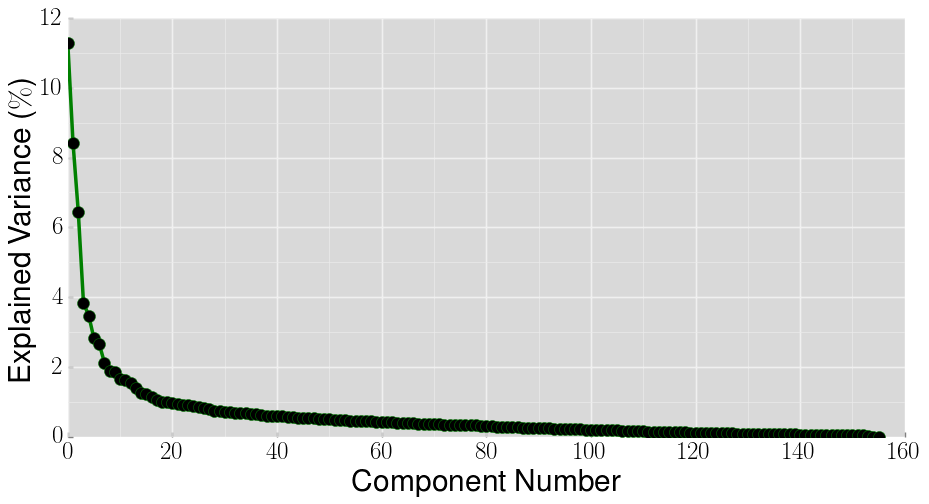

In [4]:
### SVD analysis and getting the EOFs
PC, s, EOF = np.linalg.svd(mht_anomaly)

## how many important components we have ? 
ev = s*100.0/np.sum(s)

fig1 = plt.figure(num=1,figsize=(15,7.5),facecolor='w')
ax1 = plt.gca()

ax1.plot(ev,'g',lw=3.5)
ax1.plot(ev,'o',markerfacecolor='k',markeredgecolor='g',markersize=12)

rstyle(ax1)

# Seting the axes
#ax1.set_xticks(date[range(12,253,24)])
ax1.tick_params(labelsize=25)

ax1.set_xlabel('Component Number',fontsize=30,fontweight='bold')
ax1.set_ylabel(ur'Explained Variance ($\%$)',fontsize=30,fontweight='bold')



Note we have 8 components that describe more than 2% of the data variance. However how many of those components are realy statistical significant ? Probably only a few, therefore the real explained variance should only take into account the statistical significant ones. 

Here we won't perform a significance test !

## Part 3. Exploring the estructure of the most important component and data reconstruction

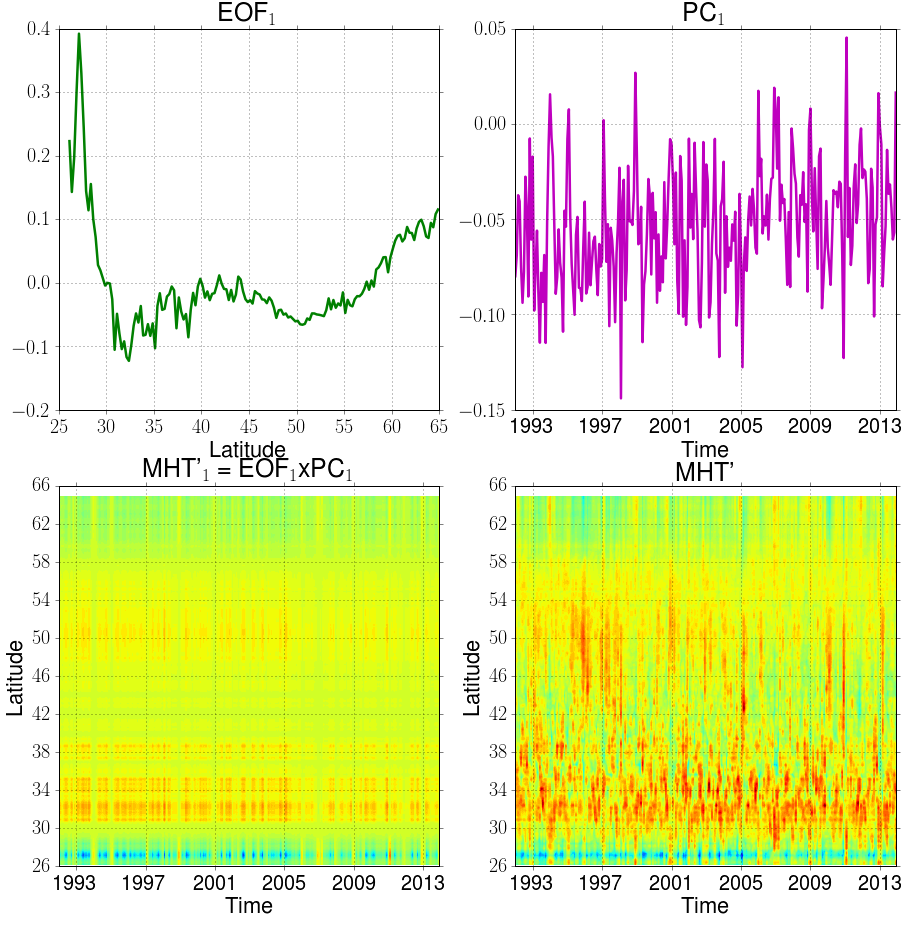

In [5]:
## EOF1, PC1 and data reconstruction 

S = np.diag(s)
PC1 = PC[:,:1]
EOF1 = EOF[:1,:]

# Data reconstruction using only EOF1 x PC1
d1 = PC1.dot(S[0,0]).dot(EOF1)


## Theorectly component that explains 11% of the variance 
ranges = np.linspace(mht_anomaly.min(),mht_anomaly.max(),50)
fig2,axes2 = plt.subplots(figsize=(15,15),nrows=2,ncols=2,facecolor='w')

# EOF1
axes2[0,0].plot(lat,EOF1.squeeze(),'g',lw=2.5)

# PC1
axes2[0,1].plot(date,PC1.squeeze(),'m',lw=2.5)

# EOF1 x PC1
cm1 = axes2[1,0].contourf(date,lat,d1.transpose(),ranges,extend='both')

# mht anomaly
cm2 = axes2[1,1].contourf(date,lat,mht_anomaly.transpose(),ranges,extend='both')

# Seting titles
axes2[0,0].set_title(ur'EOF$_{1}$',fontsize=25,fontweight='demibold')
axes2[0,1].set_title(ur'PC$_{1}$',fontsize=25,fontweight='demibold')
axes2[1,0].set_title("MHT'$_{1}$ = EOF$_{1}$xPC$_{1}$",fontsize=25,fontweight='demibold')
axes2[1,1].set_title("MHT'",fontsize=25,fontweight='demibold')

# Seting the axes 
axes2[0,1].set_xticks(date[range(12,253,48)])
axes2[1,0].set_xticks(date[range(12,253,48)]); axes2[1,0].set_yticks(range(26,69,4))
axes2[1,1].set_xticks(date[range(12,253,48)]); axes2[1,1].set_yticks(range(26,69,4))

axes2[0,0].set_xlabel('Latitude',fontsize=22,fontweight='demibold')
axes2[0,1].set_xlabel('Time',fontsize=22,fontweight='demibold')

axes2[1,0].set_ylabel('Latitude',fontsize=22,fontweight='demibold')
axes2[1,0].set_xlabel('Time',fontsize=22,fontweight='demibold')

axes2[1,1].set_ylabel('Latitude',fontsize=22,fontweight='demibold')
axes2[1,1].set_xlabel('Time',fontsize=22,fontweight='demibold')

axes2[0,0].tick_params(labelsize=20); axes2[0,1].tick_params(labelsize=20)
axes2[1,0].tick_params(labelsize=20); axes2[1,1].tick_params(labelsize=20)

axes2[0,0].grid('on'); axes2[0,1].grid('on');
axes2[1,0].grid('on'); axes2[1,1].grid('on');




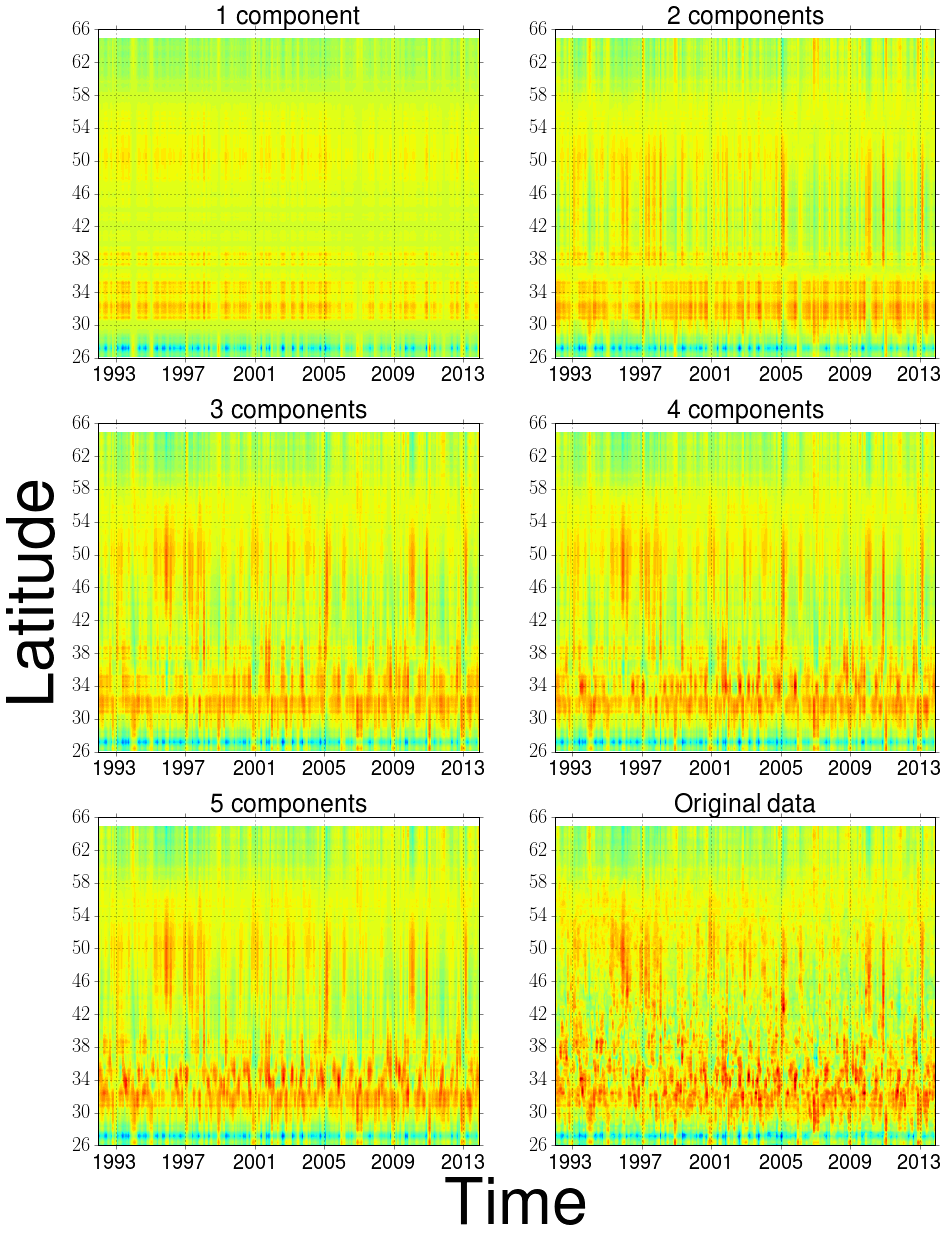

In [6]:
### Reconstruction using from 1 to 5 components 

PC2 = PC[:,:2]
EOF2 = EOF[:2,:]

PC3 = PC[:,:3]
EOF3 = EOF[:3,:]

PC4 = PC[:,:4]
EOF4 = EOF[:4,:]

PC5 = PC[:,:5]
EOF5 = EOF[:5,:]

# Data reconstruction 
d2 = PC2.dot(S[:2,:2]).dot(EOF2)
d3 = PC3.dot(S[:3,:3]).dot(EOF3)
d4 = PC4.dot(S[:4,:4]).dot(EOF4)
d5 = PC5.dot(S[:5,:5]).dot(EOF5)

fig4,axes4 = plt.subplots(figsize=(15,20),nrows=3,ncols=2,facecolor='w')


axes4[0,0].contourf(date,lat,d1.transpose(),ranges,extend='both')
axes4[0,1].contourf(date,lat,d2.transpose(),ranges,extend='both')

axes4[1,0].contourf(date,lat,d3.transpose(),ranges,extend='both')
axes4[1,1].contourf(date,lat,d4.transpose(),ranges,extend='both')

axes4[2,0].contourf(date,lat,d5.transpose(),ranges,extend='both')
axes4[2,1].contourf(date,lat,mht_anomaly.transpose(),ranges,extend='both')

# Seting titles
axes4[0,0].set_title(ur'1 component',fontsize=25,fontweight='demibold')
axes4[0,1].set_title(ur'2 components',fontsize=25,fontweight='demibold')
axes4[1,0].set_title(ur'3 components',fontsize=25,fontweight='demibold')
axes4[1,1].set_title(ur'4 components',fontsize=25,fontweight='demibold')
axes4[2,0].set_title(ur'5 components',fontsize=25,fontweight='demibold')
axes4[2,1].set_title(ur'Original data',fontsize=25,fontweight='demibold')


# Seting the axes
axes4[0,0].set_xticks(date[range(12,253,48)]); axes4[0,0].set_yticks(range(26,69,4))
axes4[0,1].set_xticks(date[range(12,253,48)]); axes4[0,1].set_yticks(range(26,69,4))
axes4[1,0].set_xticks(date[range(12,253,48)]); axes4[1,0].set_yticks(range(26,69,4))
axes4[1,1].set_xticks(date[range(12,253,48)]); axes4[1,1].set_yticks(range(26,69,4))
axes4[2,0].set_xticks(date[range(12,253,48)]); axes4[2,0].set_yticks(range(26,69,4))
axes4[2,1].set_xticks(date[range(12,253,48)]); axes4[2,1].set_yticks(range(26,69,4))


axes4[1,0].set_ylabel('Latitude',fontsize=65,fontweight='demibold')
axes4[2,0].set_xlabel('Time',fontsize=65,fontweight='demibold',x=1.1)


axes4[0,0].tick_params(labelsize=20); axes4[0,1].tick_params(labelsize=20)
axes4[1,0].tick_params(labelsize=20); axes4[1,1].tick_params(labelsize=20)
axes4[2,0].tick_params(labelsize=20); axes4[2,1].tick_params(labelsize=20)

axes4[0,0].grid('on'); axes4[0,1].grid('on');
axes4[1,0].grid('on'); axes4[1,1].grid('on');
axes4[2,0].grid('on'); axes4[2,1].grid('on');

